# Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import minimize
from datetime import datetime

import package_DBR
from package_DBR import myRound, FOPDT,SOPDT, Process, Bode

# Load Data

In [2]:
nameFile = 'Open_loop_experiment_on_MV_2022-02-28-10h14.txt'
titleName = nameFile.split('.')[0]    
data = pd.read_csv('Data/' + nameFile)
t = data['t'].values - data['t'].values[0]
MV = data['MV'].values
PV = data['PV'].values
DV = data['DV'].values

# Clean Data

In [3]:
tstep = np.argwhere(np.diff(MV) != 0)
tstep = tstep[0][0]
tm = t[tstep:]
tm = tm - tm[0]    
MVstep = MV[tstep + 1] - MV[tstep]
MVm = MV[tstep:]
PVm = PV[tstep:]
PVm = (PVm - PVm[0])/MVstep
MVm = (MVm - MVm[0])/MVstep 




In [4]:
K= 0.395
T= 56.343
theta=20.304
Ts=1

K2= 0.395
T1= 47.837
T2= 17.397
theta_2= 9.314


e = 2.71828

#-----------
#Graphically obtained values
a = 0.129
t1 = 37.25
t2 = 49.02
Kg = 0.39
Tu = 13.73
Tg = 90.19
#----------

#-----------
#Broida model values from graphically obtained values simpler version
Tgbs = Tg
thetagbs = Tu
#-----------


#-----------
#Broida model values from graphically obtained values more complicated version
Tgb = 5.5*(t2-t1)
thetagb = 2.8*t1-1.8*t2
#-----------

#-----------
#van der Grinted values from graphically obtained values
T1vdgg = Tg*((3*a*e-1)/(1+a*e))
T2vdgg =Tg*((1-a*e)/(1+a*e))
thetavdgg = Tu-((T1vdgg*T2vdgg)/(T1vdgg+3*T2vdgg))
#-----------

#-----------
#Strejc values from graphically obtained values
n = 2
Tstr = Tg/2.72
Tuth = 0.10*Tg
thetastr = Tu-Tuth
#-----------

print(T1vdgg)
print(T2vdgg)
print(thetavdgg)

3.470580348193516
43.35970982590323
12.603203416006485


# Plot experimental and simulated data

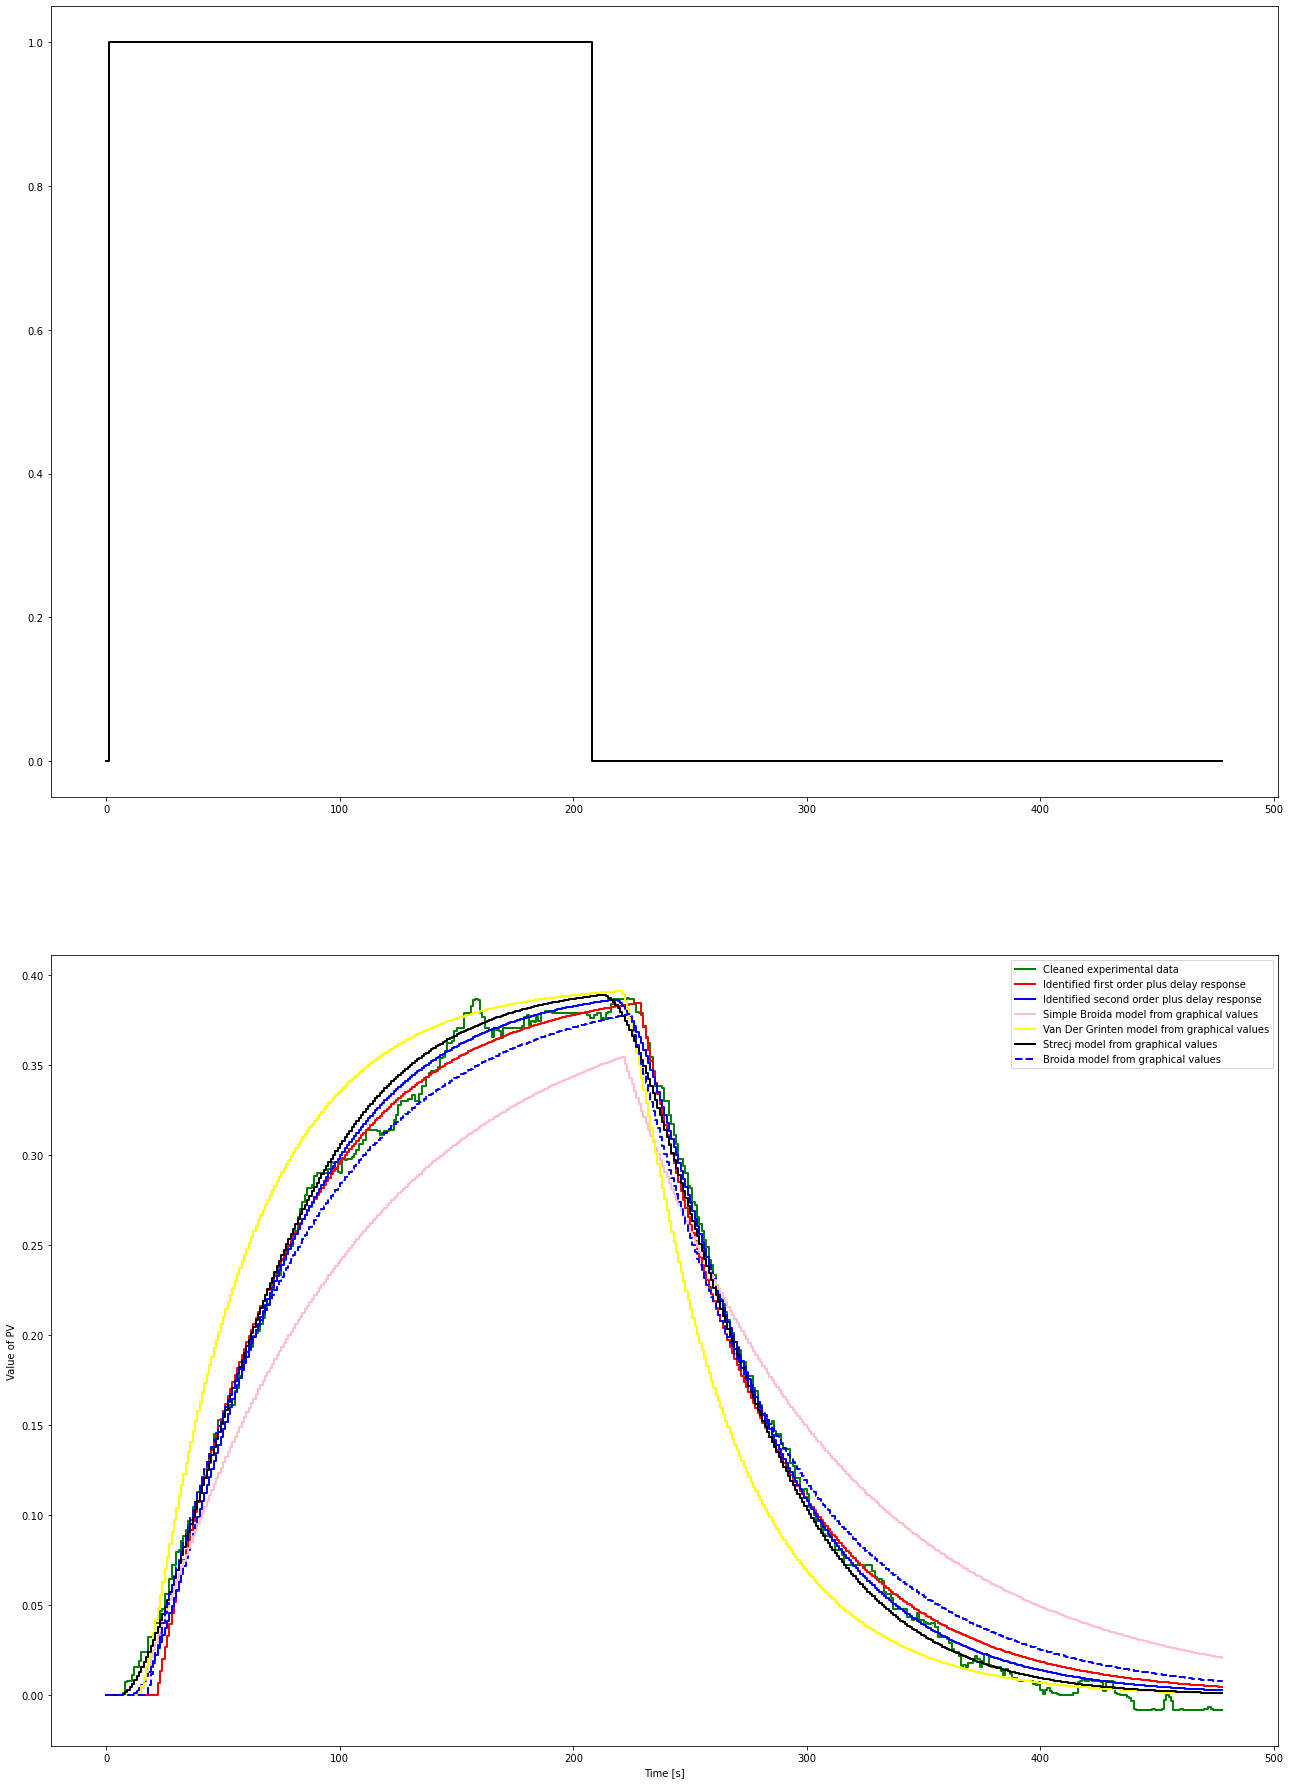

In [5]:
PVSim_1 = FOPDT(MVm,K,T,theta,Ts)
PVSim_2 = SOPDT(MVm,K2,T1,T2,theta_2,Ts)
PVSim_Broida_graph_simple = FOPDT(MVm,K,Tgbs,thetagbs,Ts)
PVSim_Broida_graph = FOPDT(MVm,K,Tgb,thetagb,Ts)
PVSim_VDG = SOPDT(MVm,K,T1vdgg,T2vdgg,thetavdgg,Ts)
PVSim_STR = SOPDT(MVm,K,Tstr,Tstr,thetastr,Ts)
fig ,(ax,bx) = plt.subplots(2)
fig.set_figheight(32)
fig.set_figwidth(22)

ax.step(tm,MVm,'black',linewidth=2,label='Cleaned MV',where='post')
bx.step(tm,PVm,'g-',linewidth=2,label='Cleaned experimental data',where='post')
bx.step(tm,PVSim_1,'r-',linewidth=2,label='Identified first order plus delay response',where='post')
bx.step(tm,PVSim_2,'b-',linewidth=2,label='Identified second order plus delay response',where='post')
bx.step(tm,PVSim_Broida_graph_simple,'pink',linewidth=2,label='Simple Broida model from graphical values',where='post')
bx.step(tm,PVSim_VDG,'yellow',linewidth=2,label='Van Der Grinten model from graphical values',where='post')
bx.step(tm,PVSim_STR,'black',linewidth=2,label='Strecj model from graphical values',where='post')
bx.step(tm,PVSim_Broida_graph,'b--',linewidth=2,label='Broida model from graphical values',where='post')
bx.set(ylabel='Value of PV')
bx.set(xlabel='Time [s]')
bx.legend(loc='best')


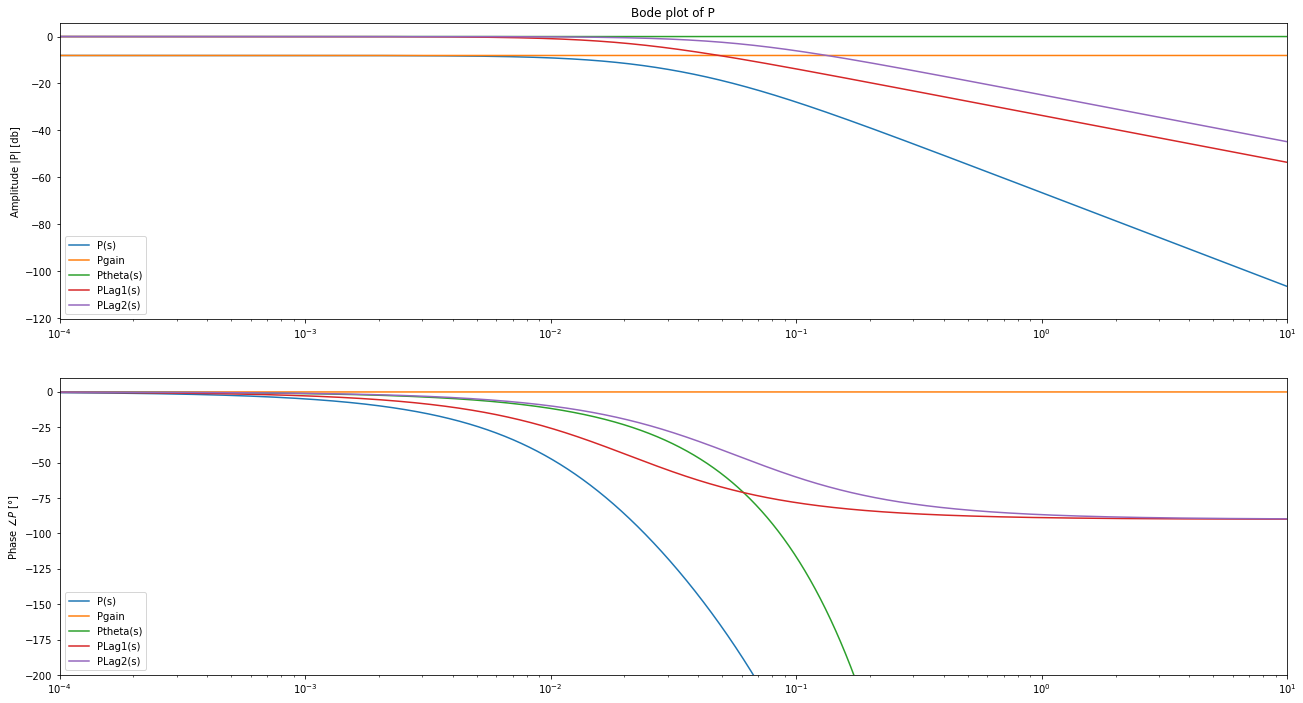

In [6]:
# PVSim_1 = np.fft.fft(PVSim_1)
# PVSim_2 = np.fft.fft(PVSim_2)
# PVSim_Broida_graph_simple = np.fft.fft(PVSim_Broida_graph_simple)
# PVSim_Broida_graph = np.fft.fft(PVSim_Broida_graph)
# PVSim_VDG = np.fft.fft(PVSim_VDG)
# PVSim_STR = np.fft.fft(PVSim_STR)

# tm = np.fft.fftfreq(tm.shape[-1])

# plt.figure(figsize = (22,12))

# #plt.step(tm,PVm,'g-',linewidth=2,label='Cleaned experimental data',where='post')
# #plt.step(tm,PVSim_1,'r-',linewidth=2,label='Identified first order plus delay response',where='post')
# plt.step(tm,PVSim_2,'b-',linewidth=2,label='Identified second order plus delay response',where='post')
# plt.step(tm,PVSim_Broida_graph_simple,'pink',linewidth=2,label='Simple Broida model from graphical values',where='post')
# plt.step(tm,PVSim_VDG,'yellow',linewidth=2,label='Van Der Grinten model from graphical values',where='post')
# plt.step(tm,PVSim_STR,'black',linewidth=2,label='Strecj model from graphical values',where='post')
# plt.step(tm,PVSim_Broida_graph,'b--',linewidth=2,label='Broida model from graphical values',where='post')

# plt.legend(loc='best')
omega = np.logspace(-4, 1, 10000)
P = Process({'Kp':K,'theta':theta,'Tlag1':T1,'Tlag2':T2})
Bode(P,omega)
